# Tarea 2 Análisis de Datos
#### Felipe Covarrubias, Vicente Silva y Félix Valdés 

Instrucciones: Gráfico cantidad de casos nuevos de COVID-19 en la Región Metopolitana, Santiago. 


Aclaración previa: Profesor, debido a que la tarea en un princpio era sin nota, con varios compañeros la discutimos y es por eso que los códigos de todos nosotros se parecen.

In [32]:
#Importamos todas las librerías necesarias para el desarrollo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
#Creamos un Dataframe con el producto 1 del Github del ministerio, ya que este contiene la cantidad de casos por día. 
df = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',')

In [34]:
df

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03,Tasa
0,Arica y Parinacota,15,Arica,15101.0,247552.0,6.0,6.0,12.0,41.0,63.0,...,31125.0,31208.0,31361.0,31438.0,31519.0,31566.0,31643.0,31662.0,31713.0,12810.6
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,73.0,5920.5
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,88.0,10864.2
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,216.0,216.0,216.0,217.0,216.0,217.0,217.0,217.0,217.0,8628.2
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,211.0,211.0,212.0,213.0,214.0,215.0,225.0,230.0,233.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,Magallanes,12,Rio Verde,12103.0,211.0,0.0,0.0,0.0,0.0,0.0,...,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,18.0,8530.8
358,Magallanes,12,San Gregorio,12104.0,681.0,0.0,0.0,0.0,0.0,0.0,...,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,74.0,10866.4
359,Magallanes,12,Timaukel,12303.0,282.0,0.0,0.0,0.0,0.0,0.0,...,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,42.0,14893.6
360,Magallanes,12,Torres del Paine,12402.0,1021.0,0.0,0.0,0.0,0.0,0.0,...,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,22.0,2154.8


In [35]:
df1 = df[df["Region"] == "Metropolitana"] #trabajaremos solamente con la RM por lo que creamos otro df.

In [36]:
df1.drop('Tasa', axis=1, inplace=True) # eliminamos los datos que dicen "tasa"

C:\Users\felip\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [37]:
df2 = df1.melt(id_vars=["Region","Codigo region","Comuna","Codigo comuna","Poblacion"], var_name="fecha", value_name="casos") #reorganizamos el df escribiendo las fechas hacia abajo.

In [38]:
df2

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,fecha,casos
0,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-30,0.0
1,Metropolitana,13,Buin,13402.0,109641.0,2020-03-30,7.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,2020-03-30,6.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,2020-03-30,0.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,2020-03-30,19.0
...,...,...,...,...,...,...,...
9429,Metropolitana,13,Santiago,13101.0,503147.0,2021-12-03,49748.0
9430,Metropolitana,13,Talagante,13601.0,81838.0,2021-12-03,6094.0
9431,Metropolitana,13,Tiltil,13303.0,21477.0,2021-12-03,2117.0
9432,Metropolitana,13,Vitacura,13132.0,96774.0,2021-12-03,6069.0


In [39]:
df2.drop('Codigo region', axis=1, inplace=True)
df2.drop('Codigo comuna', axis=1, inplace=True)
df2.drop('Poblacion', axis=1, inplace=True)

In [40]:
df2['fecha'] = pd.to_datetime(df2['fecha'])

In [41]:
df3 = df2.groupby('Region').resample('W-Mon', on='fecha').sum().reset_index().sort_values(by='fecha')
df3

,Region,fecha,casos
0,Metropolitana,2020-03-30,1180.0
1,Metropolitana,2020-04-06,5405.0
2,Metropolitana,2020-04-13,9524.0
3,Metropolitana,2020-04-20,14740.0
4,Metropolitana,2020-04-27,14521.0
...,...,...,...
84,Metropolitana,2021-11-08,1751393.0
85,Metropolitana,2021-11-15,1769738.0
86,Metropolitana,2021-11-22,1783954.0
87,Metropolitana,2021-11-29,1796781.0


In [42]:
df3["CasosNuevos"] = df3["casos"]-df3["casos"].shift()


In [43]:
df3

,Region,fecha,casos,CasosNuevos
0,Metropolitana,2020-03-30,1180.0,NaN
1,Metropolitana,2020-04-06,5405.0,4225.0
2,Metropolitana,2020-04-13,9524.0,4119.0
3,Metropolitana,2020-04-20,14740.0,5216.0
4,Metropolitana,2020-04-27,14521.0,-219.0
...,...,...,...,...
84,Metropolitana,2021-11-08,1751393.0,17440.0
85,Metropolitana,2021-11-15,1769738.0,18345.0
86,Metropolitana,2021-11-22,1783954.0,14216.0
87,Metropolitana,2021-11-29,1796781.0,12827.0


In [44]:
df4 = df3[df3["CasosNuevos"]>0].reset_index()
df4.drop('index', axis = 1, inplace = True)
df4.drop('casos', axis = 1, inplace = True)
df4.head()


,Region,fecha,CasosNuevos
0,Metropolitana,2020-04-06,4225.0
1,Metropolitana,2020-04-13,4119.0
2,Metropolitana,2020-04-20,5216.0
3,Metropolitana,2020-05-04,9443.0
4,Metropolitana,2020-05-11,15225.0


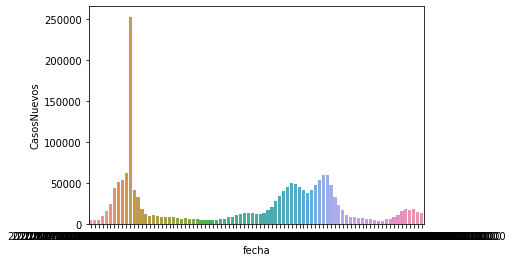

In [45]:
sns.barplot(x="fecha", y="CasosNuevos", data=df4)

In [46]:
df5 = df4[df4["fecha"] < "2020-06-29"]

In [47]:
df6 = df4[df4["fecha"] > "2020-06-29" ]

In [48]:
df7 = pd.concat([df5,df6], axis = 0)

In [49]:
df7

,Region,fecha,CasosNuevos
0,Metropolitana,2020-04-06,4225.0
1,Metropolitana,2020-04-13,4119.0
2,Metropolitana,2020-04-20,5216.0
3,Metropolitana,2020-05-04,9443.0
4,Metropolitana,2020-05-11,15225.0
...,...,...,...
80,Metropolitana,2021-11-01,17779.0
81,Metropolitana,2021-11-08,17440.0
82,Metropolitana,2021-11-15,18345.0
83,Metropolitana,2021-11-22,14216.0


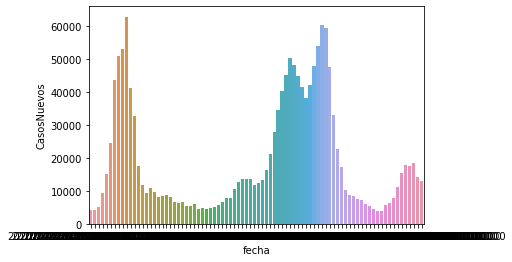

In [50]:
sns.barplot(x="fecha", y="CasosNuevos", data = df7)

In [1]:
#Como se puede observar en el gráfico, no existe outliers.